In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
import datetime
start = '2012-01-01'
end = datetime.date.today()
stock='GOOG'
data = yf.download(stock, start, end)

/tmp/ipython-input-2-3841632793.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...
2025-07-01,176.910004,177.220001,174.660004,176.804993,25778500
2025-07-02,179.759995,179.934998,176.089996,176.544998,19325900


In [4]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
3392,2025-07-01,176.910004,177.220001,174.660004,176.804993,25778500
3393,2025-07-02,179.759995,179.934998,176.089996,176.544998,19325900
3394,2025-07-03,180.550003,180.770004,178.190002,179.820007,13287400


In [5]:
ma_100_days = data.Close.rolling(100).mean()

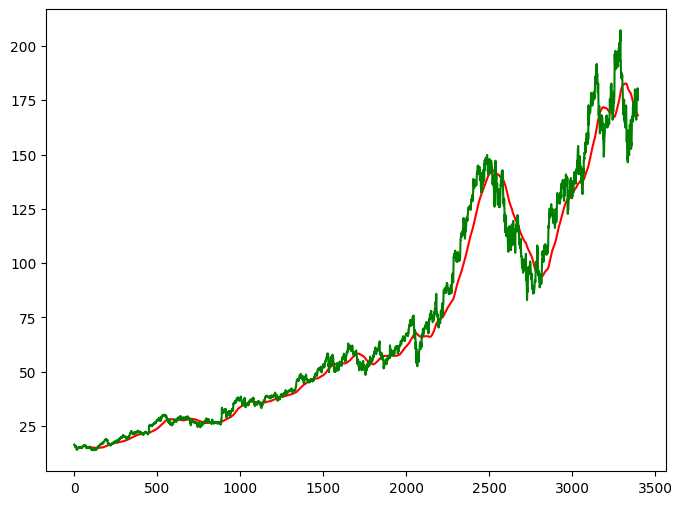

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
data.dropna(inplace=True)

In [8]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [9]:
data_train.shape

(2717, 1)

In [10]:
data_test.shape

(680, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [14]:
x, y = np.array(x), np.array(y)

In [15]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras import metrics


In [16]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [19]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 4.4305e-04 - loss: 0.0437
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.0012 - loss: 0.0059
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 6.6146e-04 - loss: 0.0050
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 1.2244e-04 - loss: 0.0045
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.0014 - loss: 0.0050
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 5.4889e-04 - loss: 0.0042
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.0013 - loss: 0.0029
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 2.7796e-04 - loss: 0.0038
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 4.1036e-04 - loss: 0.0032
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.0010 - loss: 0.0029
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.0010 - loss: 0.0029
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━

In [21]:
pas_100_days = data_train.tail(100)

In [22]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [23]:
data_test.shape

(780, 1)

In [26]:
data_test_scale = scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [28]:
print(x.shape)
print(y.shape)

(680, 100, 1)
(680,)


In [29]:
y_pred = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_pred*scale

In [32]:
y = y*scale

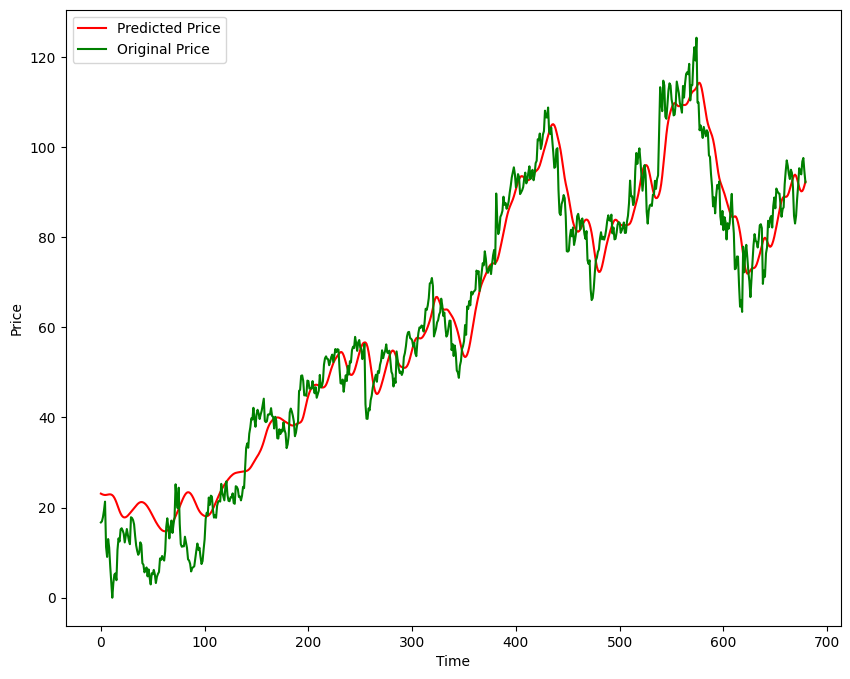

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Predictions Model.keras')